<a href="https://colab.research.google.com/github/Megancodes2017/Megancodes2017/blob/main/Best_RF_Casty_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pybaseball

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.1/426.1 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 432.7/432.7 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 21.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pybaseball import fielding_stats
from sklearn.preprocessing import StandardScaler

In [3]:
# Pull RF data from 2022-2025
all_years = []
for year in range(2022, 2026):
  df = fielding_stats(year, position='RF')
  df['Year'] = year
  all_years.append(df)

rf_data = pd.concat(all_years, ignore_index=True)

In [4]:
# Keep ARM
df = rf_data[['Name', 'Year', 'ARM']].copy()

In [5]:
# Aggregate across seasons
df_total = df.groupby('Name', as_index=False).sum(numeric_only=True)

In [6]:
# Rank by ARM
df_ranked = df_total[['Name', 'ARM']].sort_values('ARM', ascending=False).reset_index(drop=True)

print('Top 10 RFs by ARM Runs Saved (2022-2025):')
print(df_ranked.head(10))

Top 10 RFs by ARM Runs Saved (2022-2025):
                 Name   ARM
0       Adolis Garcia  13.2
1        Alex Verdugo   6.6
2  Fernando Tatis Jr.   5.7
3        Mookie Betts   3.8
4      Hunter Renfroe   2.8
5        Seiya Suzuki   2.5
6        Wilyer Abreu   2.4
7     Lawrence Butler   2.3
8   Teoscar Hernandez   1.0
9         Kyle Tucker   0.2


In [7]:
print(df_ranked.tail(10))

                 Name   ARM
15          Juan Soto  -0.4
16         Max Kepler  -0.8
17    George Springer  -0.8
18  Anthony Santander  -1.1
19           Jo Adell  -1.3
20   Mike Yastrzemski  -1.9
21        Taylor Ward  -2.9
22        Lane Thomas  -3.1
23     Starling Marte  -4.2
24   Nick Castellanos -12.8


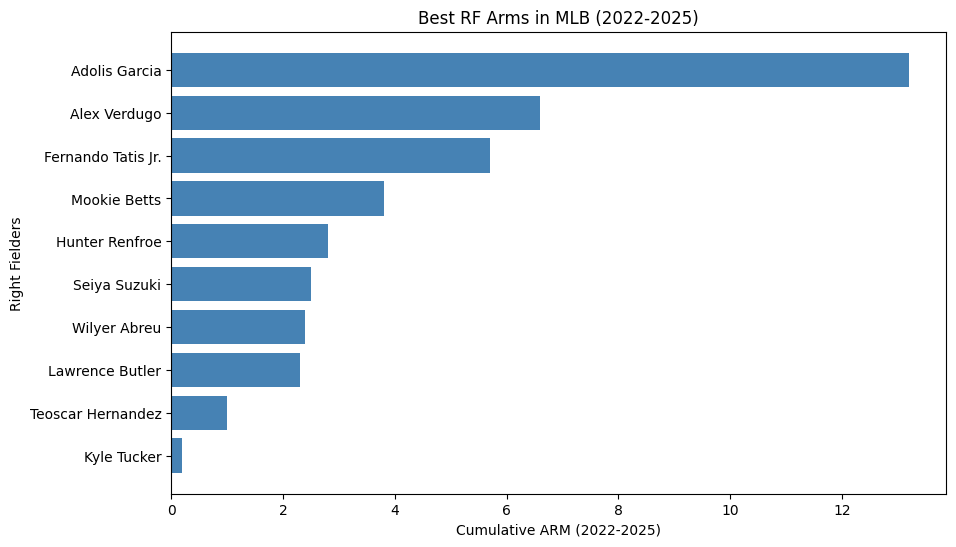

In [8]:
# Visualization
plt.figure(figsize=(10,6))
plt.barh(df_ranked.head(10)['Name'], df_ranked.head(10)['ARM'], color='steelblue')
plt.xlabel('Cumulative ARM (2022-2025)')
plt.ylabel('Right Fielders')
plt.title('Best RF Arms in MLB (2022-2025)')
plt.gca().invert_yaxis()  #best on top
plt.show()

In [9]:
# Keep OAA
df = rf_data[['Name', 'Year', 'OAA']].copy()

In [10]:
# Aggregate across seasons
df_total = df.groupby('Name', as_index=False).sum(numeric_only=True)

In [11]:
# Rank by OAA
df_ranked = df_total[['Name', 'OAA']].sort_values('OAA', ascending=False).reset_index(drop=True)

print('Top 10 RFs by OAA (2022-2025):')
print(df_ranked.head(10))

Top 10 RFs by OAA (2022-2025):
                 Name  OAA
0  Fernando Tatis Jr.   20
1        Wilyer Abreu   15
2      Corbin Carroll    8
3         Sal Frelick    6
4          Max Kepler    4
5        Mookie Betts    2
6         Taylor Ward    2
7           Cam Smith    1
8        Alex Verdugo    1
9     George Springer    0


In [12]:
print(df_ranked.tail(10))

                 Name  OAA
15   Mike Yastrzemski   -2
16        Kyle Tucker   -2
17     Bryan Reynolds   -3
18        Lane Thomas   -4
19   Ronald Acuna Jr.   -8
20      Adolis Garcia   -9
21     Hunter Renfroe  -11
22  Teoscar Hernandez  -13
23          Juan Soto  -27
24   Nick Castellanos  -35


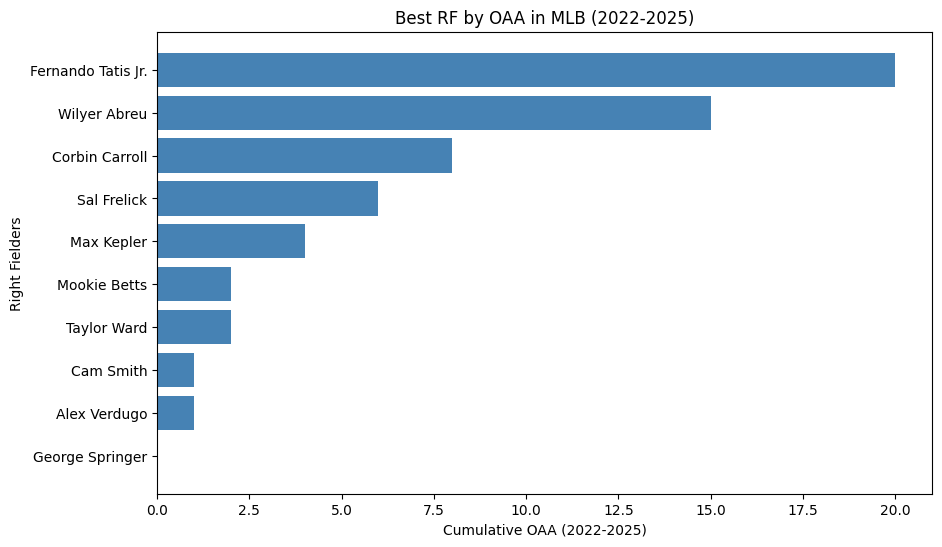

In [13]:
# Visualization
plt.figure(figsize=(10,6))
plt.barh(df_ranked.head(10)['Name'], df_ranked.head(10)['OAA'], color='steelblue')
plt.xlabel('Cumulative OAA (2022-2025)')
plt.ylabel('Right Fielders')
plt.title('Best RF by OAA in MLB (2022-2025)')
plt.gca().invert_yaxis()  #best on top
plt.show()

In [14]:
# Keep DRS
df = rf_data[['Name', 'Year', 'DRS']].copy()

In [15]:
# Aggregate across seasons
df_total = df.groupby('Name', as_index=False).sum(numeric_only=True)

In [16]:
# Rank by DRS
df_ranked = df_total[['Name', 'DRS']].sort_values('DRS', ascending=False).reset_index(drop=True)

print('Top 10 RFs by DRS (2022-2025):')
print(df_ranked.head(10))

Top 10 RFs by DRS (2022-2025):
                 Name  DRS
0  Fernando Tatis Jr.   46
1        Wilyer Abreu   32
2       Adolis Garcia   18
3        Mookie Betts   15
4    Mike Yastrzemski   13
5         Kyle Tucker   13
6           Cam Smith   11
7        Alex Verdugo    9
8         Sal Frelick    9
9            Jo Adell    6


In [17]:
print('Bottom 10 RFs by DRS (2022-2025):')
print(df_ranked.tail(10))

Bottom 10 RFs by DRS (2022-2025):
                 Name  DRS
15     Bryan Reynolds   -1
16    Lawrence Butler   -1
17       Seiya Suzuki   -2
18   Ronald Acuna Jr.   -2
19        Taylor Ward   -3
20  Teoscar Hernandez   -5
21          Juan Soto   -7
22  Anthony Santander   -7
23     Hunter Renfroe  -11
24   Nick Castellanos  -40


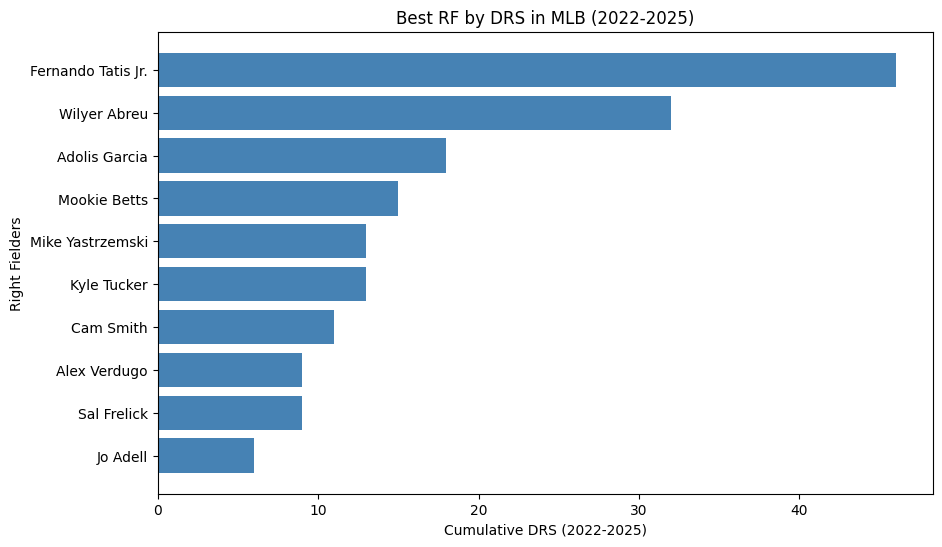

In [18]:
# Visualization
plt.figure(figsize=(10,6))
plt.barh(df_ranked.head(10)['Name'], df_ranked.head(10)['DRS'], color='steelblue')
plt.xlabel('Cumulative DRS (2022-2025)')
plt.ylabel('Right Fielders')
plt.title('Best RF by DRS in MLB (2022-2025)')
plt.gca().invert_yaxis()  #best on top
plt.show()

In [19]:
# Keep RngR
df = rf_data[['Name', 'Year', 'RngR']].copy()

In [20]:
# Aggregate across seasons
df_total = df.groupby('Name', as_index=False).sum(numeric_only=True)

In [21]:
# Rank by RngR
df_ranked = df_total[['Name', 'RngR']].sort_values('RngR', ascending=False).reset_index(drop=True)

print('Top 10 RFs by RngR (2022-2025):')
print(df_ranked.head(10))

Top 10 RFs by RngR (2022-2025):
                 Name  RngR
0  Fernando Tatis Jr.   8.6
1        Mookie Betts   8.0
2        Wilyer Abreu   6.0
3            Jo Adell   3.8
4        Alex Verdugo   3.6
5          Max Kepler   3.6
6   Anthony Santander   1.7
7         Taylor Ward   1.1
8   Teoscar Hernandez   1.0
9         Kyle Tucker   0.4


In [22]:
print('Bottom 10 RFs by RngR (2022-2025):')
print(df_ranked.tail(10))

Bottom 10 RFs by RngR (2022-2025):
                Name  RngR
15   Lawrence Butler  -0.8
16  Mike Yastrzemski  -0.9
17   George Springer  -1.8
18  Ronald Acuna Jr.  -3.2
19       Lane Thomas  -4.0
20    Starling Marte  -5.0
21    Hunter Renfroe  -5.1
22     Adolis Garcia  -6.2
23         Juan Soto  -9.4
24  Nick Castellanos -21.5


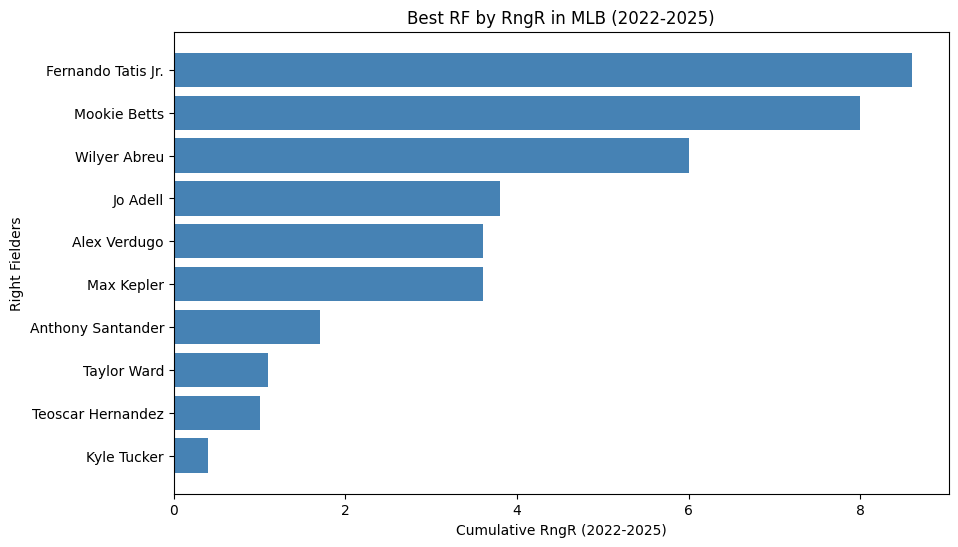

In [23]:
# Visualization
plt.figure(figsize=(10,6))
plt.barh(df_ranked.head(10)['Name'], df_ranked.head(10)['RngR'], color='steelblue')
plt.xlabel('Cumulative RngR (2022-2025)')
plt.ylabel('Right Fielders')
plt.title('Best RF by RngR in MLB (2022-2025)')
plt.gca().invert_yaxis()  #best on top
plt.show()

In [24]:
# Keep ErrR
df = rf_data[['Name', 'Year', 'ErrR']].copy()

In [25]:
# Aggregate across seasons
df_total = df.groupby('Name', as_index=False).sum(numeric_only=True)

In [26]:
# Rank by ErrR
df_ranked = df_total[['Name', 'ErrR']].sort_values('ErrR', ascending=False).reset_index(drop=True)

print('Top 10 RFs by ErrR (2022-2025):')
print(df_ranked.head(10))

Top 10 RFs by ErrR (2022-2025):
                Name  ErrR
0   Nick Castellanos   3.4
1    George Springer   2.3
2          Juan Soto   1.7
3        Kyle Tucker   1.3
4       Mookie Betts   1.0
5     Starling Marte   1.0
6  Anthony Santander   0.8
7        Lane Thomas   0.8
8         Max Kepler   0.8
9       Alex Verdugo   0.3


In [27]:
print('Bottom 10 RFs by ErrR (2022-2025):')
print(df_ranked.tail(10))

Bottom 10 RFs by ErrR (2022-2025):
                  Name  ErrR
15      Corbin Carroll   0.0
16    Mike Yastrzemski  -0.1
17   Teoscar Hernandez  -0.2
18  Fernando Tatis Jr.  -0.4
19            Jo Adell  -0.5
20      Hunter Renfroe  -0.6
21         Taylor Ward  -0.8
22        Seiya Suzuki  -1.2
23        Wilyer Abreu  -1.6
24       Adolis Garcia  -1.7


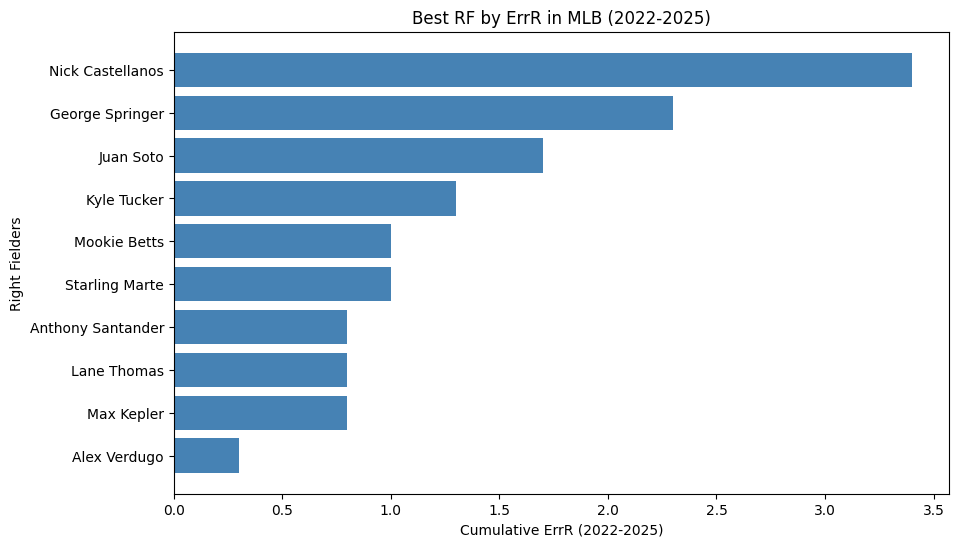

In [28]:
# Visualization
plt.figure(figsize=(10,6))
plt.barh(df_ranked.head(10)['Name'], df_ranked.head(10)['ErrR'], color='steelblue')
plt.xlabel('Cumulative ErrR (2022-2025)')
plt.ylabel('Right Fielders')
plt.title('Best RF by ErrR in MLB (2022-2025)')
plt.gca().invert_yaxis()  #best on top
plt.show()

In [29]:
# Pull fielding data for 2015-2025
all_years = []
for year in range(2015, 2026):
  df = fielding_stats(year, position='RF')
  df['Year'] = year
  all_years.append(df)

rf_fielding = pd.concat(all_years, ignore_index=True)

In [30]:
# Filter Castellanos
casty = rf_fielding[rf_fielding['Name'] == 'Nick Castellanos']
casty = casty[['Year', 'Team', 'DRS', 'UZR', 'RngR', 'ARM', 'ErrR', 'OAA']].reset_index(drop=True)

In [31]:
# League-average RF metrics by year
league_avg = rf_fielding.groupby('Year')[['DRS', 'UZR', 'RngR', 'ARM', 'ErrR', 'OAA']].mean().reset_index()

In [32]:
# Merge Casty vs league average
compare = pd.merge(casty, league_avg, on='Year', suffixes=('_Castellanos', '_LeagueAvg'))

print('\nNick Castellanos vs RF League Average (2015-2025):')
print(compare)


Nick Castellanos vs RF League Average (2015-2025):
   Year   Team  DRS_Castellanos  UZR_Castellanos  RngR_Castellanos  \
0  2018    DET              -19            -12.9             -12.0   
1  2019  - - -               -9             -4.4              -4.6   
2  2020    CIN               -4             -3.0              -0.7   
3  2021    CIN               -7             -1.5              -1.3   
4  2022    PHI               -8             -6.9              -4.0   
5  2023    PHI               -9            -13.3             -10.6   
6  2024    PHI              -11            -10.7              -6.9   
7  2025    PHI              -12              NaN               NaN   

   ARM_Castellanos  ErrR_Castellanos  OAA_Castellanos  DRS_LeagueAvg  \
0             -1.5               0.6            -23.0      -0.636364   
1             -1.5               1.6             -7.0       1.750000   
2             -0.9              -1.4             -3.0       1.000000   
3             -1.0           

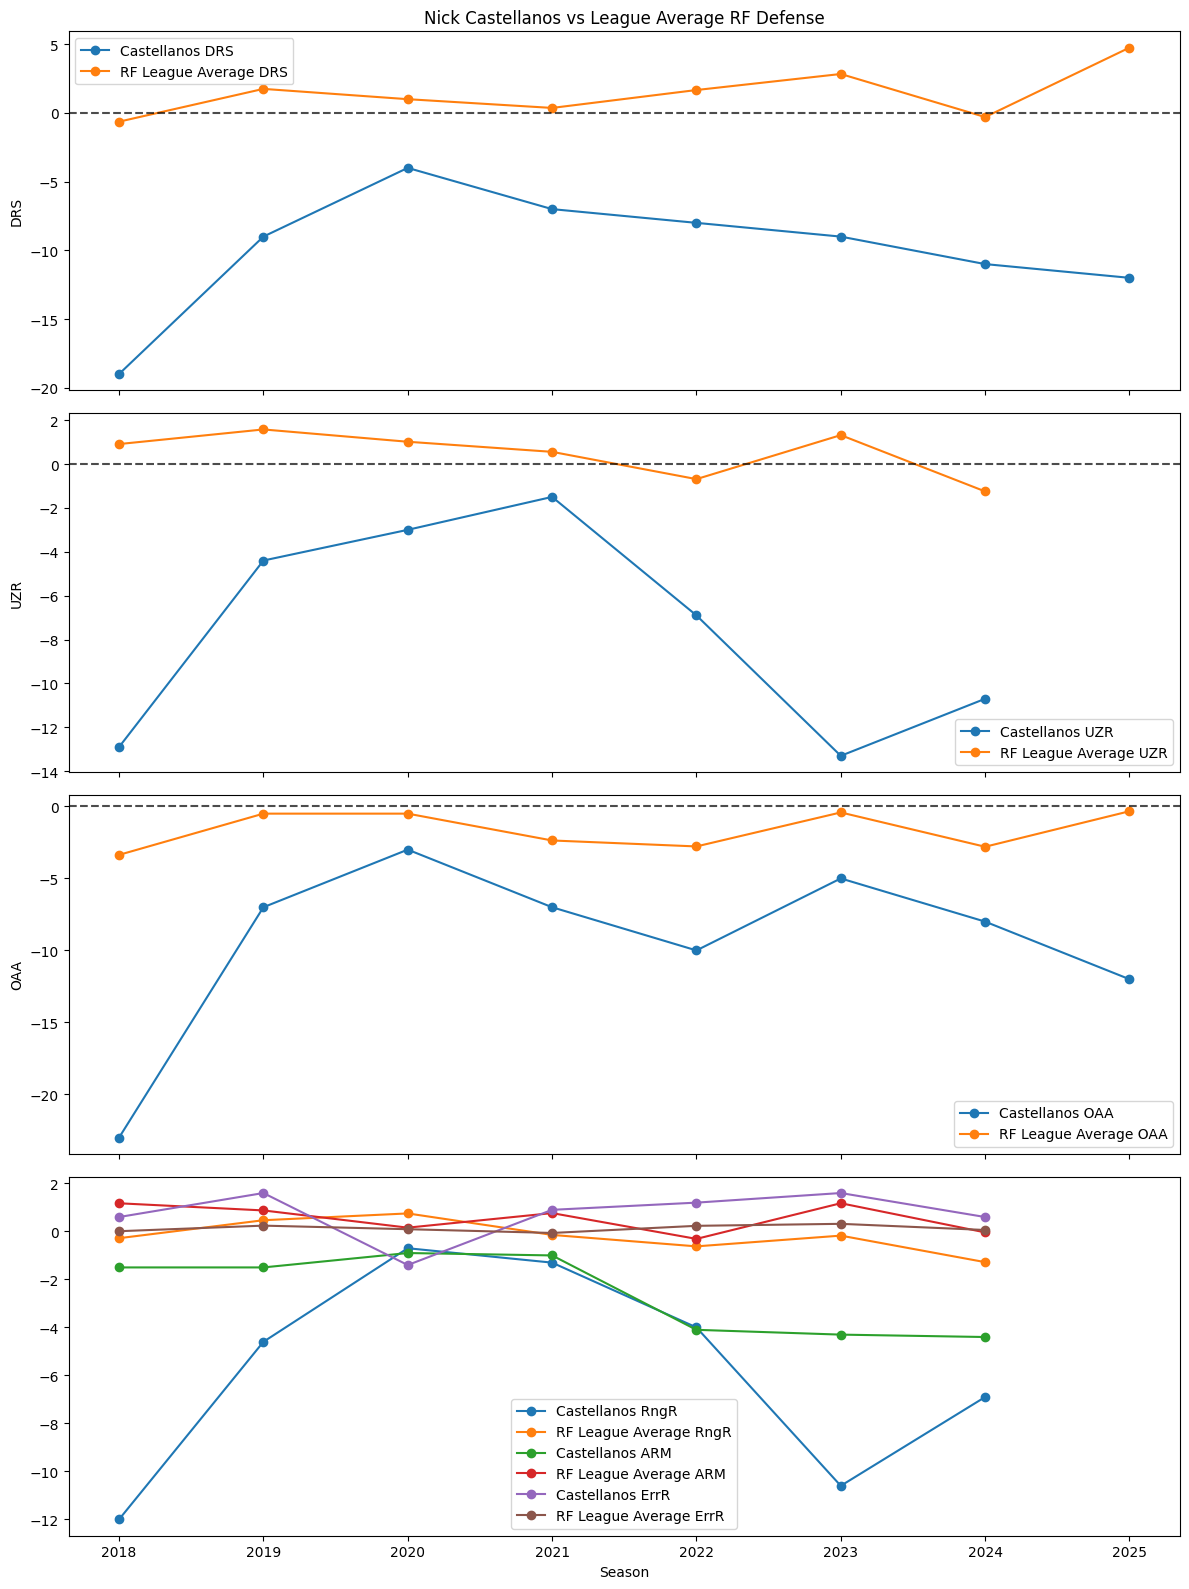

In [34]:
# Visualization
fig, axes = plt.subplots(4, 1, figsize=(12, 16), sharex=True)

# DRS
axes[0].plot(compare['Year'], compare['DRS_Castellanos'], marker='o', label = 'Castellanos DRS')
axes[0].plot(compare['Year'], compare['DRS_LeagueAvg'], marker='o', label = 'RF League Average DRS')
axes[0].axhline(0, color='black', linestyle='--', alpha=0.7)
axes[0].set_ylabel('DRS')
axes[0].set_title('Nick Castellanos vs League Average RF Defense')
axes[0].legend()

# UZR
axes[1].plot(compare['Year'], compare['UZR_Castellanos'], marker='o', label = 'Castellanos UZR')
axes[1].plot(compare['Year'], compare['UZR_LeagueAvg'], marker='o', label = 'RF League Average UZR')
axes[1].axhline(0, color='black', linestyle='--', alpha=0.7)
axes[1].set_ylabel('UZR')
axes[1].legend()

# OAA
axes[2].plot(compare['Year'], compare['OAA_Castellanos'], marker='o', label = 'Castellanos OAA')
axes[2].plot(compare['Year'], compare['OAA_LeagueAvg'], marker='o', label = 'RF League Average OAA')
axes[2].axhline(0, color='black', linestyle='--', alpha=0.7)
axes[2].set_ylabel('OAA')
axes[2].legend()

# Components (Range, Arm, Errors combined vs league average)
axes[3].plot(compare['Year'], compare['RngR_Castellanos'], marker='o', label = 'Castellanos RngR')
axes[3].plot(compare['Year'], compare['RngR_LeagueAvg'], marker='o', label = 'RF League Average RngR')
axes[3].plot(compare['Year'], compare['ARM_Castellanos'], marker='o', label = 'Castellanos ARM')
axes[3].plot(compare['Year'], compare['ARM_LeagueAvg'], marker='o', label = 'RF League Average ARM')
axes[3].plot(compare['Year'], compare['ErrR_Castellanos'], marker='o', label = 'Castellanos ErrR')
axes[3].plot(compare['Year'], compare['ErrR_LeagueAvg'], marker='o', label = 'RF League Average ErrR')
axes[3].legend()

plt.xlabel('Season')
plt.tight_layout()
plt.show()